# Testing if it's possible for peaks to overlap

In [1]:
import os
import glycoproteomics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("png")
figure_size = (8, 4)
dpi = 80

Read in spectrum from one of the known control samples.

In [2]:
spectrum = glycoproteomics.io.read_spectrum_file(
    os.path.join("tests", "data", "spectrum.txt.gz")
)
ions = glycoproteomics.spectrum.list_ions(spectrum)
print(ions)

['138.055', '144.066', '168.066', '186.076', '204.087', '243.026', '274.092', '292.103', '308.098', '366.139', '405.079', '485.046', '512.197', '657.235']


Plot the spectra.

In [3]:
rt_x_bin_size = 0.06
mz_y_bin_size = 2.0

binned_spectrum = glycoproteomics.spectrum.bin(
    spectrum,
    rt_x_bin_size,
    mz_y_bin_size,
    np.mean
)

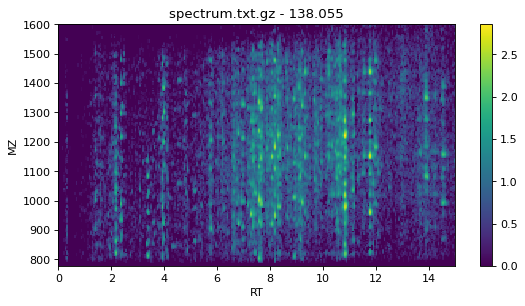

In [4]:
ion = ions[0]
ion_matrix, x_label, y_label = glycoproteomics.spectrum.to_matrix(binned_spectrum, [ion])
glycoproteomics.plotting.plot_ion_matrix(
    ion_matrix,
    x_label,
    y_label,
    "spectrum.txt.gz - " + ion,
    figure_size,
    dpi
)
plt.show()

Calling the top 100 peaks from this file

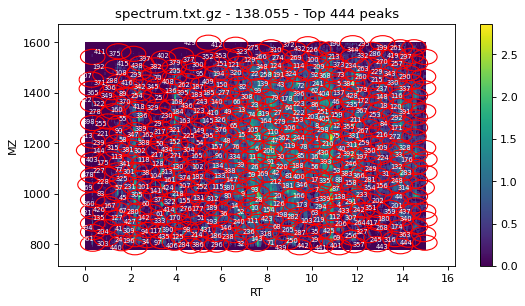

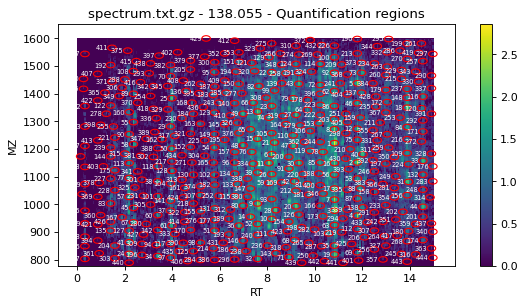

In [5]:
top_N_peaks = 10000

quantify_x_radius = rt_x_bin_size * 3.0
quantify_y_radius = mz_y_bin_size * 5.0

exclusion_x_radius = quantify_x_radius * 3.0
exclusion_y_radius = quantify_y_radius * 3.0

peaks = glycoproteomics.peaks.find(
    ion_matrix,
    x_label,
    y_label,
    top_N_peaks,
    exclusion_x_radius,
    exclusion_y_radius
)

glycoproteomics.plotting.plot_ion_matrix_with_peaks(
    ion_matrix,
    x_label,
    y_label,
    peaks,
    exclusion_x_radius,
    exclusion_y_radius,
    "spectrum.txt.gz - " + ion + " - Top {} peaks".format(len(peaks)),
    figure_size,
    dpi
)
plt.show()

glycoproteomics.plotting.plot_ion_matrix_with_peaks(
    ion_matrix,
    x_label,
    y_label,
    peaks,
    quantify_x_radius,
    quantify_y_radius,
    "spectrum.txt.gz - " + ion + " - Quantification regions",
    figure_size,
    dpi
)
plt.show()

Now need to check that the peaks are not overlapping. I will do this by creating sets of coordinates included in each peak, and checking that these coordinates are only used for one.

In [6]:
peak_dict = {}

for peak in peaks:
    peak_x, peak_y = peak[0]
    peak_dict.setdefault(peak[0], [])
    for i, x in enumerate(x_label):
        for j, y in enumerate(y_label):
            if (x - peak_x) ** 2 / quantify_x_radius ** 2 + (
                y - peak_y
            ) ** 2 / quantify_y_radius ** 2 <= 1.0:
                peak_dict[peak[0]].append((i, j))

all_quantified_bins = [val for sublist in peak_dict.values() for val in sublist]

print("All quantified bins: {}".format(len(all_quantified_bins)))
print("Unique quantified bins: {}".format(len(list(set(all_quantified_bins)))))

All quantified bins: 19504
Unique quantified bins: 19504


As the total number of bins and the total unique bin count are the same, then there is no overlap in this set.

The above code has been incorporated into a separate function, which returns `True` if the peaks do not overlap and `False` if they do overlap.

In [7]:
print("Do peaks' quanitfy radii not overlap? {}".format(
    glycoproteomics.peaks.assert_no_overlap(
        x_label, y_label, peaks, quantify_x_radius, quantify_y_radius
    )
))

print("Do peaks' exclusion radii not overlap? {}".format(
    glycoproteomics.peaks.assert_no_overlap(
        x_label, y_label, peaks, exclusion_x_radius, exclusion_y_radius
    )
))

Do peaks' quanitfy radii not overlap? True
Do peaks' exclusion radii not overlap? False
